In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [31]:
with open("training_set.json") as datafile:
  data_training = json.load(datafile)
training_set = pd.DataFrame(data_training)

with open("testing_set.json") as datafile:
  data_testing = json.load(datafile)
testing_set = pd.DataFrame(data_testing)

In [32]:
training_set.head(10)

,intent,sentence
0,irrelevant,"850€ maximum pour le loyer, à partir de janvie..."
1,irrelevant,D'imprimer
2,purchase,Le meilleur cabriolet hybrid moins de 5m10 min...
3,find-hotel,en ce moment je cher un location pour les vaca...
4,irrelevant,c'est possible de t'utiliser la nuit ?
5,irrelevant,J'ai besoin d'acheter un fusil
6,irrelevant,Vous pouvez réserver pour 09h oui
7,irrelevant,Du 20 au 22 novembre pour 100-150 euros la nuit
8,purchase,Mon docteur m'a suggéré de porter des bandes p...
9,purchase,Commande à effectuer : 30 bloc note petits car...


In [33]:
testing_set.head(10)

,intent,sentence
0,irrelevant,Tu sais où je peux acheter un bazooka ?
1,irrelevant,déco de maison style maison ferret
2,irrelevant,j'ai envie qu'on se rencontre
3,purchase,J’ai besoin de fleurs pr ma grand mère
4,find-restaurant,trouve à champigny-sur-marne où manger de la c...
5,irrelevant,Réécoutez
6,find-train,trouve-moi un billet de train demain pour Angers
7,irrelevant,"idiwii, Logement avec cuisine"
8,irrelevant,Il faudrait que tu me fasses un devis pour le ...
9,irrelevant,"Pas du tout, c'est le sf de valthorens"


In [34]:
training_set.describe()

,intent,sentence
count,6035,6035
unique,8,6035
top,irrelevant,Merci pour vos recherches !
freq,3852,1


In [35]:
testing_set.describe()

,intent,sentence
count,1065,1065
unique,8,1064
top,irrelevant,Est ce que tu connais des sites internet sur l...
freq,677,2


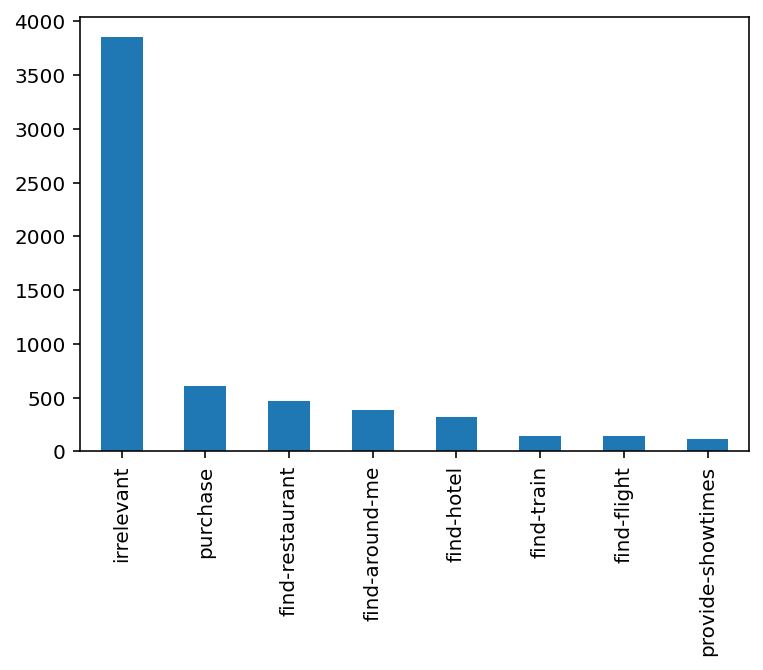

In [43]:
training_set["intent"].value_counts().plot(kind='bar')
#training_count = training_set["intent"].value_counts().hist()
#testing_count = testing_set["intent"].value_counts().hist()
plt.show()
# todo: print occurence number on the plot?
# compare w/ testing set

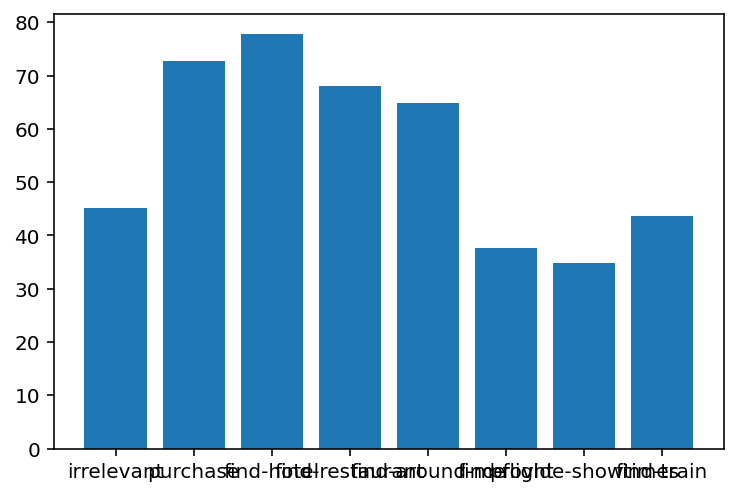

In [37]:
def letters_per_class(data):
    letters_p_classes = {}
    occurences_of_classes = {}
    for i in range (len(data)):
        if data[i]["intent"] in letters_p_classes:
            letters_p_classes[data[i]["intent"]] += len(data[i]["sentence"])
            occurences_of_classes[data[i]["intent"]] += 1
        else :
            letters_p_classes[data[i]["intent"]] = 1
            occurences_of_classes[data[i]["intent"]] = len(data[i]["sentence"])


    for i in letters_p_classes:
        letters_p_classes[i] = letters_p_classes[i]/occurences_of_classes[i]

    fig = plt.figure()
    plt.bar(letters_p_classes.keys(),letters_p_classes.values())
    plt.show()
letters_per_class(data_training)